<a href="https://colab.research.google.com/github/Elliefffish/ml-final-Stitanic/blob/main/%E3%80%8Cml_final_project_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gulidelines for Homework & Term Project
1. You should do proper data analysis and feature engineering in the begining.
2. You should try different model architectures (perhaps starting from simple ones if not using transfer learning) and doing hyperparameter tuning. Moreover, you should always consider applying normalization techniques in the model.
3. You should use the performance on validation set (better with cross validation) to select the best model. Moreover, you should use the learing curves to identify the sign of underfitting/overfitting and deal with the identified problem.
4. After determining your best model, you should train the best model on the full training set (including the validation set), and this gives you the final model.
5. You should present the following information in the concluding paragraph:
  1. Description of your final model including model architecture, number of parameters, and associated mechanisms.
  2. Performance of the final model on the test set. Notice that you can only present the test performance once.

 # Chapter2. Outline
 1. Look at the big picture.
 2. Get the data.
 3. Discover and visualize the data to gain insights.
 4. Prepare the data for Machine Learning algorithms.
 5. Select a model and train it.
 6. Fine-tune your model.
 7. Present your solution.
 8. Launch, monitor, and maintain your system.

# 畫圖工具

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import math
# Create an array with the colors you want to use
colors = ["#A2C4C9", "#E49788"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

# Big picture

# Get data

In [ ]:
''' Download kaggle data in Google Colab '''
! pip install -q kaggle
from google.colab import files

# 登入 Kaggle > My Account > Create New API Token，這步會在你的電腦下載一個 kaggle.json 檔案。
# 上傳剛剛下載好的 kaggle.json 檔案。
files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

! kaggle competitions download -c 'spaceship-titanic'
! mkdir spaceship-titanic
! unzip spaceship-titanic.zip -d spaceship-titanic

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
spaceship-titanic.zip: Skipping, found more recently modified local copy (use --force to force download)
mkdir: cannot create directory ‘spaceship-titanic’: File exists
Archive:  spaceship-titanic.zip
replace spaceship-titanic/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
import numpy as np
train = pd.read_csv('spaceship-titanic/train.csv')
test = pd.read_csv('spaceship-titanic/test.csv')

- `PassengerId` - A unique Id for each passenger. Each Id takes the form `gggg_pp` where `gggg` indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- `HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.
- `CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- `Cabin` - The cabin number where the passenger is staying. Takes the form `deck/num/side`, where side can be either `P` for Port or `S` for Starboard.
- `Destination` - The planet the passenger will be debarking to.
- `Age` - The age of the passenger.
- `VIP` - Whether the passenger has paid for special VIP service during the voyage.
- `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- `Name` - The first and last names of the passenger.
- `Transported` - Whether the passenger was transported to another dimension. **This is the target, the column you are trying to predict**.

# Discover and Visualize the data

In [ ]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Text(0.5, 0, 'Age')

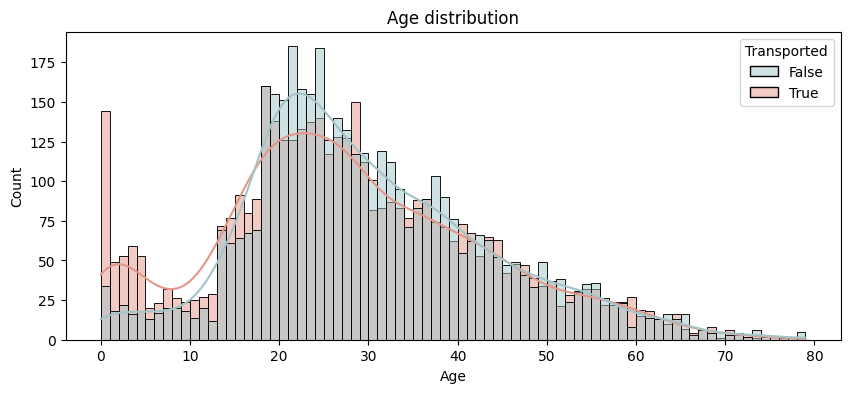

In [ ]:
# Figure size
plt.figure(figsize=(10,4))

# Histogram
sns.histplot(data=train, x='Age', hue='Transported', binwidth=1, kde=True)

# Aesthetics
plt.title('Age distribution')
plt.xlabel('Age')

In [ ]:
train['VIP'].value_counts()

,count
VIP,
False,8291
True,199


In [ ]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Text(0.5, 0, 'Age')

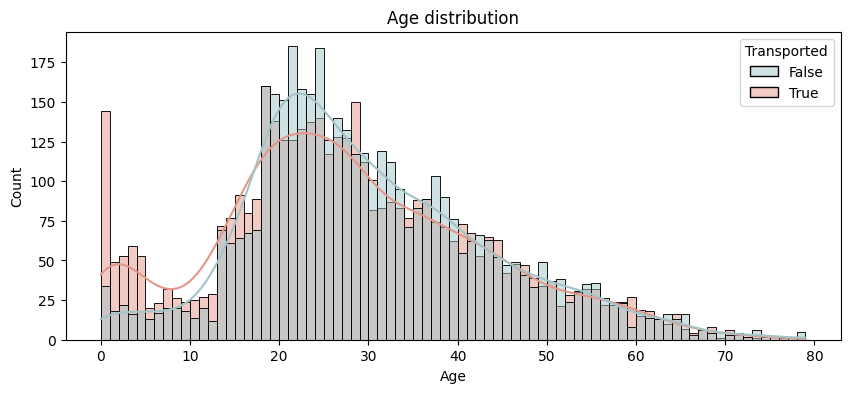

In [204]:
# Figure size
plt.figure(figsize=(10,4))

# Histogram
sns.histplot(data=train, x='Age', hue='Transported', binwidth=1, kde=True)

# Aesthetics
plt.title('Age distribution')
plt.xlabel('Age')

In [ ]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
test['CryoSleep'].value_counts()

,count
CryoSleep,
False,2640
True,1544


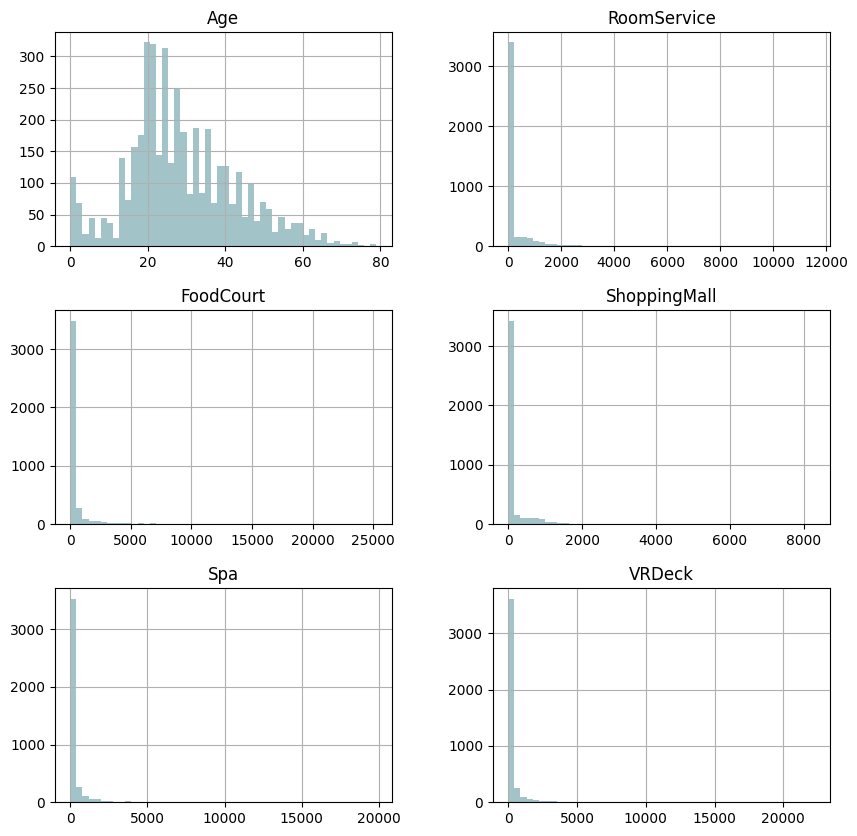

In [ ]:
test.hist(bins=50,figsize=(10,10))
plt.show()

# Prepare Data for ML Algorithms

##  Data Cleaning

In [209]:
# quickcheck for missing values
train_summary = pd.DataFrame({
    'Unique Values': train.nunique(),
    'Data Type': train.dtypes,
    'Missing Values': train.isnull().sum()
})

# Display the summary table
train_summary

,Unique Values,Data Type,Missing Values
PassengerId,8693,object,0
HomePlanet,3,object,201
CryoSleep,2,object,217
Cabin,6560,object,199
Destination,3,object,182
Age,80,float64,179
VIP,2,object,203
RoomService,1273,float64,181
FoodCourt,1507,float64,183
ShoppingMall,1115,float64,208


In [210]:
# quickcheck for missing values
test_summary = pd.DataFrame({
    'Unique Values': test.nunique(),
    'Data Type': test.dtypes,
    'Missing Values': test.isnull().sum()
})

# Display the summary table
test_summary

,Unique Values,Data Type,Missing Values
PassengerId,4277,object,0
HomePlanet,3,object,87
CryoSleep,2,object,93
Cabin,3265,object,100
Destination,3,object,92
Age,79,float64,91
VIP,2,object,93
RoomService,842,float64,82
FoodCourt,902,float64,106
ShoppingMall,715,float64,98


|              | Datatype | setvalue |
|--------------|----------|----------|
| HomePlanet   | 3 class  | 4 class  |
| CryoSleep    | T/F      | mode     |
| Cabin        |          |          |
| Destination  | 3 class  | 4 class  |
| Age          | float64  | median   |
| VIP          | T/F      | mode     |
| RoomService  | float64  | mode     |
| FoodCourt    | float64  | mode     |
| ShoppingMall | float64  | mode     |
| Spa          | float64  | mode     |
| VRDeck       | float64  | mode     |
| Name         |          | drop     |

In [2]:
passenger = train.sort_values(by='PassengerId')
passenger_test = test.sort_values(by='PassengerId')

NameError: name 'train' is not defined

In [212]:
#---------- 處理 Cabin - Train ----------#

# PassengerId (gggg_pp) -> GroupId (gggg)
# Cabin 的 NAN 會參考 GroupId 設定值
passenger[["GroupId", "ppId"]] = passenger.PassengerId.str.split(pat="_", expand=True)
passenger['GroupId'] = pd.to_numeric(passenger['GroupId'], downcast='integer', errors='coerce')

# Set Cabin
for i in passenger[passenger.Cabin.isna()].index:
    # if there are any group member，set Cabin as them.
    if passenger.loc[i, 'GroupId'] == passenger.loc[i - 1, 'GroupId']:
        passenger.loc[i, 'Cabin'] = passenger.loc[i - 1, 'Cabin']
    elif passenger.loc[i, 'GroupId'] == passenger.loc[i + 1, 'GroupId']:
        passenger.loc[i, 'Cabin'] = passenger.loc[i + 1, 'Cabin']
    # else set Cabin as foreward person
    # else:
    #     passenger.loc[i, 'Cabin'] = passenger.loc[i - 1, 'Cabin']
passenger['Cabin'].fillna('Z/9999/Z', inplace=True)

# Cabin (deck/num/side)
passenger[['Cabin_deck', 'Cabin_num', 'Cabin_side']] = passenger.Cabin.str.split(pat="/", expand=True)
passenger['Cabin_num'] = pd.to_numeric(passenger['Cabin_num'], downcast='integer', errors='coerce')
# Add Cabin_size
passenger['Cabin_size'] = passenger['Cabin'].map(lambda x: passenger['Cabin'].value_counts()[x])

#---------- 處理 Cabin - Test ----------#

# PassengerId (gggg_pp) -> GroupId (gggg)
# Cabin 的 NAN 會參考 GroupId 設定值
passenger_test[["GroupId", "ppId"]] = passenger_test.PassengerId.str.split(pat="_", expand=True)
passenger_test['GroupId'] = pd.to_numeric(passenger_test['GroupId'], downcast='integer', errors='coerce')

# Set Cabin
for i in passenger_test[passenger_test.Cabin.isna()].index:
    # if there are any group member，set Cabin as them.
    Group_Cabin = passenger_test.loc[passenger_test['GroupId'] == passenger_test.loc[i, 'GroupId'], 'Cabin'].mode()
    if not pd.isna(passenger_test.loc[i, 'GroupId']) and (not Group_Cabin.empty):
        passenger_test.loc[i, 'Cabin'] = Group_Cabin.iloc[0]
    # else set Cabin as foreward person
    # else:
    #     passenger_test.loc[i, 'Cabin'] = passenger_test.loc[i - 1, 'Cabin']
passenger_test['Cabin'].fillna('Z/9999/Z', inplace=True)

# # Cabin (deck/num/side)
passenger_test[['Cabin_deck', 'Cabin_num', 'Cabin_side']] = passenger_test.Cabin.str.split(pat="/", expand=True)
passenger_test['Cabin_num'] = pd.to_numeric(passenger_test['Cabin_num'], downcast='integer', errors='coerce')
# Add Cabin_size
passenger_test['Cabin_size'] = passenger_test['Cabin'].map(lambda x: passenger_test['Cabin'].value_counts()[x])

In [213]:
# cabin_list = passenger[['Cabin_deck', 'Cabin_num', 'Cabin_side']].sort_values(by=['Cabin_deck', 'Cabin_num', 'Cabin_side'])

# loss_cabin = pd.DataFrame()
# for deck in cabin_list['Cabin_deck'].unique():
#     for side in cabin_list['Cabin_side'].unique():
#         new_series = cabin_list.loc[(cabin_list['Cabin_deck'] == deck) & (cabin_list['Cabin_side'] == side), 'Cabin_num'] # 参考数列
#         min, max = new_series.agg(['min', 'max'])
#         series1 = pd.Series(range(min, max))  # 主数列

#         # 筛选出主数列中不存在于参考数列的数值
#         filtered = series1[~series1.isin(new_series)]
#         sub_df = pd.DataFrame({'Cabin_deck': deck, 'Cabin_num': filtered, 'Cabin_side': side})
#         loss_cabin = pd.concat([loss_cabin, sub_df], ignore_index=True)
# loss_cabin

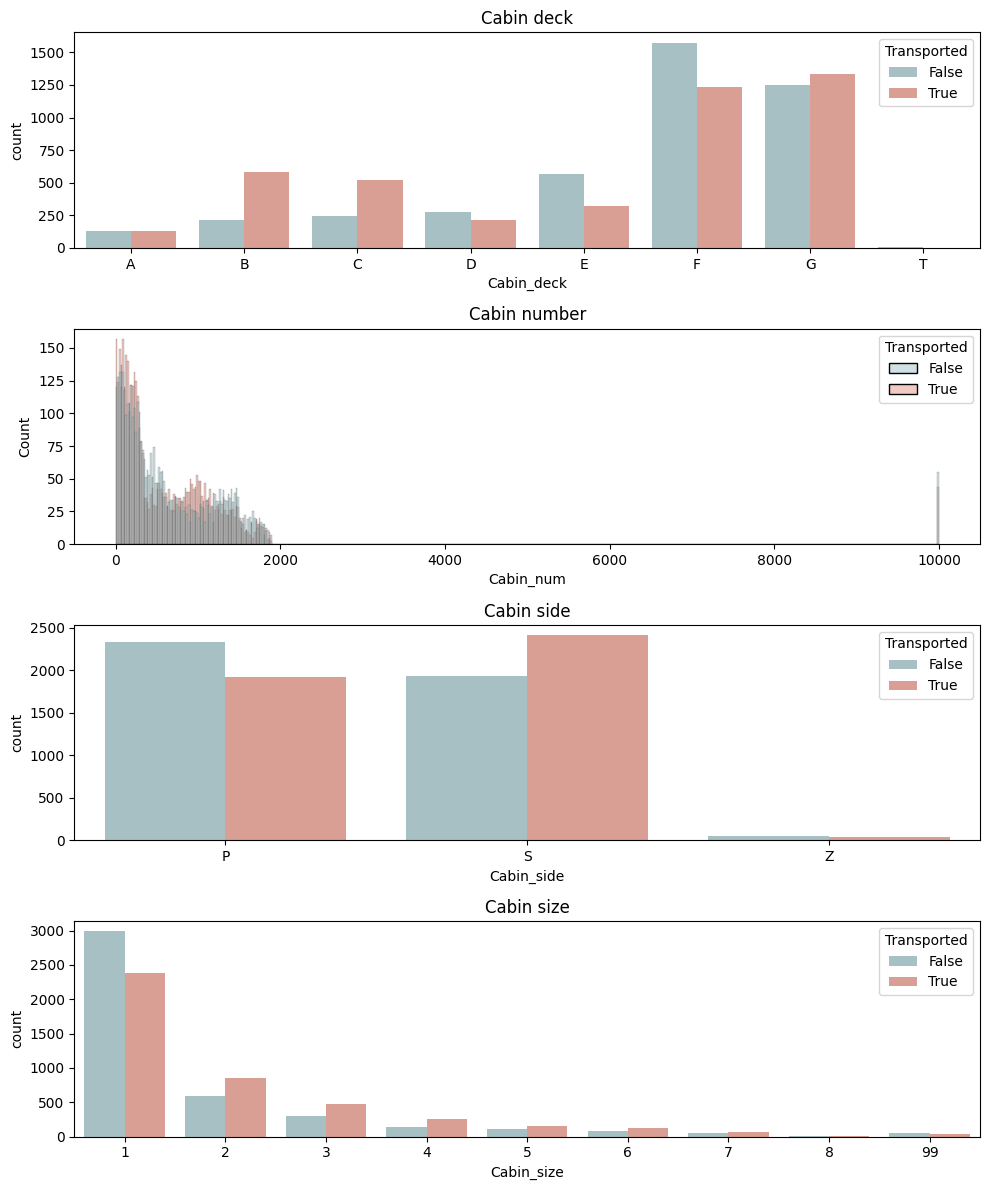

In [214]:
# Plot distribution of new features
fig=plt.figure(figsize=(10,12))

plt.subplot(4,1,1)
sns.countplot(data=passenger, x='Cabin_deck', hue='Transported', order=['A','B','C','D','E','F','G','T'])
plt.title('Cabin deck')

plt.subplot(4,1,2)
sns.histplot(data=passenger, x='Cabin_num', hue='Transported', binwidth=20)
plt.title('Cabin number')
# plt.xlim([0,2000])

plt.subplot(4,1,3)
sns.countplot(data=passenger, x='Cabin_side', hue='Transported')
plt.title('Cabin side')

plt.subplot(4,1,4)
sns.countplot(data=passenger, x='Cabin_size', hue='Transported')
plt.title('Cabin size')
fig.tight_layout()
plt.show()

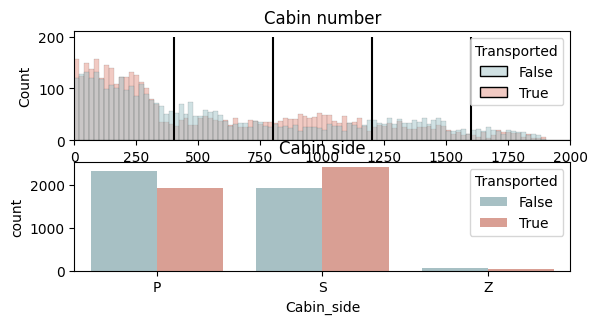

In [215]:
# Plot distribution of new features
plt.subplot(3,1,2)
sns.histplot(data=passenger, x='Cabin_num', hue='Transported',binwidth=20)
for i in range(400, 2000, 400):
    plt.vlines(i, ymin=0, ymax=200, color='black')
plt.title('Cabin number')
plt.xlim([0,2000])

plt.subplot(3,1,3)
sns.countplot(data=passenger, x='Cabin_side', hue='Transported')
plt.title('Cabin side')
fig.tight_layout()
plt.show()

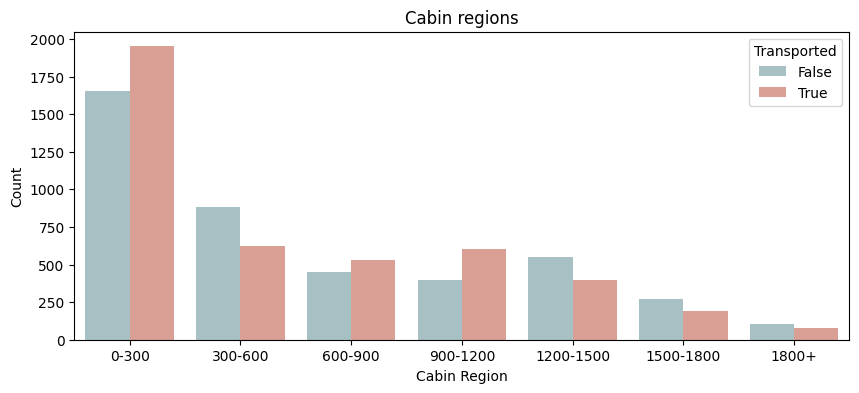

In [216]:
for i in range(300, 1800, 300):
    passenger[f'Cabin_{i/300}'] = ((passenger['Cabin_num']> i-300) & (passenger['Cabin_num'] < i)).astype('category')
    passenger_test[f'Cabin_{i/300}'] = ((passenger_test['Cabin_num']> i-300) & (passenger_test['Cabin_num'] < i)).astype('category')
passenger[f'Cabin_7.0'] = (passenger['Cabin_num'] >= 1800).astype('category')
passenger_test[f'Cabin_7.0'] = (passenger_test['Cabin_num'] >= 1800).astype('category')

# Plot the distribution of the new features
passenger['Cabin_regions_plot'] = pd.cut(
    passenger['Cabin_num'],
    bins=[0, 300, 600, 900, 1200, 1500, 1800, float('inf')],
    labels=['0-300', '300-600', '600-900', '900-1200', '1200-1500', '1500-1800', '1800+']
)

plt.figure(figsize=(10, 4))
sns.countplot(data=passenger, x='Cabin_regions_plot', hue='Transported')
plt.title('Cabin regions')
plt.xlabel('Cabin Region')
plt.ylabel('Count')
plt.show()

passenger.drop('Cabin_regions_plot', axis=1, inplace=True)

In [217]:
# Plot distribution of new features
fig=plt.figure(figsize=(10,12))

tmp = pd.DataFrame()
tmp['Cabin_num'] = passenger.loc[passenger['Cabin_deck'] == 'A', 'Cabin_num']
tmp['Transported'] = passenger.loc[passenger['Cabin_deck'] == 'A', 'Transported']

<Figure size 1000x1200 with 0 Axes>

In [218]:
#---------- 處理 HomePlanet - Train ----------#
# Replace NaN's with outliers for now (so we can split feature)
passenger['Name'].fillna('Unknown Unknown', inplace=True)
passenger_test['Name'].fillna('Unknown Unknown', inplace=True)

# Name -> FirstName, LastName
# HomePlanet 的 NAN 會參考 LastName 設定值
passenger[["FirstName", "LastName"]] = passenger.Name.str.split(pat=" ", expand=True)

# Set HomePlante
for i in passenger[passenger.HomePlanet.isna()].index:
    # if there is any family member，set HomePlanet as them.
    HomePlanet = passenger.loc[passenger['LastName'] == passenger.loc[i, 'LastName'], 'HomePlanet'].mode()
    if not HomePlanet.empty:
        passenger.loc[i, 'HomePlanet'] = HomePlanet.iloc[0]

#---------- 處理 HomePlanet - Test ----------#
# Name -> FirstName, LastName
# HomePlanet 的 NAN 會參考 LastName 設定值
passenger_test[["FirstName", "LastName"]] = passenger_test.Name.str.split(pat=" ", expand=True)

# Set HomePlante
for i in passenger_test[passenger_test.HomePlanet.isna()].index:
    # if there is any family member，set HomePlanet as them.
    HomePlanet = passenger_test.loc[passenger_test['LastName'] == passenger_test.loc[i, 'LastName'], 'HomePlanet'].mode()
    if not HomePlanet.empty:
        passenger_test.loc[i, 'HomePlanet'] = HomePlanet.iloc[0]

Text(0.5, 1.0, 'Familysize')

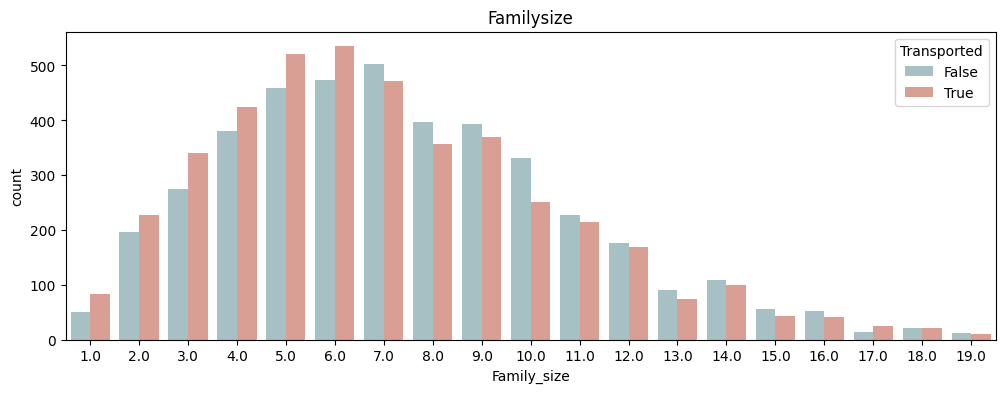

In [219]:


# New feature - Family size
passenger['Family_size']=passenger['LastName'].map(lambda x: pd.concat([passenger['LastName'],passenger_test['LastName']]).value_counts()[x])
passenger_test['Family_size']=passenger_test['LastName'].map(lambda x: pd.concat([passenger['LastName'],passenger_test['LastName']]).value_counts()[x])

# Put Nan's back in (we will fill these later)
passenger.loc[passenger['LastName']=='Unknown','LastName']=np.nan
passenger.loc[passenger['Family_size']>100,'Family_size']=np.nan
passenger_test.loc[passenger_test['LastName']=='Unknown','LastName']=np.nan
passenger_test.loc[passenger_test['Family_size']>100,'Family_size']=np.nan

# Drop name (we don't need it anymore)
#train.drop('Name', axis=1, inplace=True)
#test.drop('Name', axis=1, inplace=True)

# New feature distribution
plt.figure(figsize=(12,4))
sns.countplot(data=passenger, x='Family_size', hue='Transported')
plt.title('Familysize')

The median family size is: 7.0


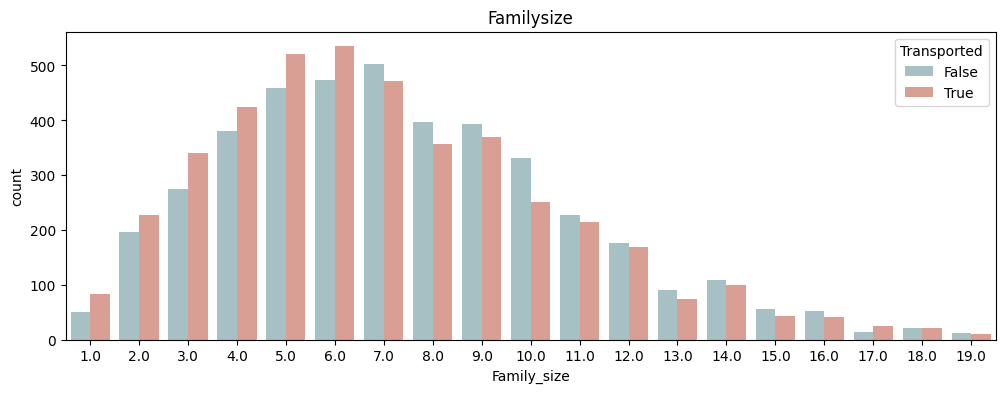

In [220]:
# New feature distribution
plt.figure(figsize=(12,4))
sns.countplot(data=passenger, x='Family_size', hue='Transported')
plt.title('Familysize')
median_family_size = passenger['Family_size'].median()
print(f"The median family size is: {median_family_size}")

In [221]:
# New feature - Family type
passenger['Small_family'] = passenger['Family_size'] < 7
passenger_test['Small_family'] = passenger_test['Family_size'] < 7

# transform Family_size to categorical
passenger['Family_size'] = passenger['Family_size'].astype('category')
passenger_test['Family_size'] = passenger_test['Family_size'].astype('category')

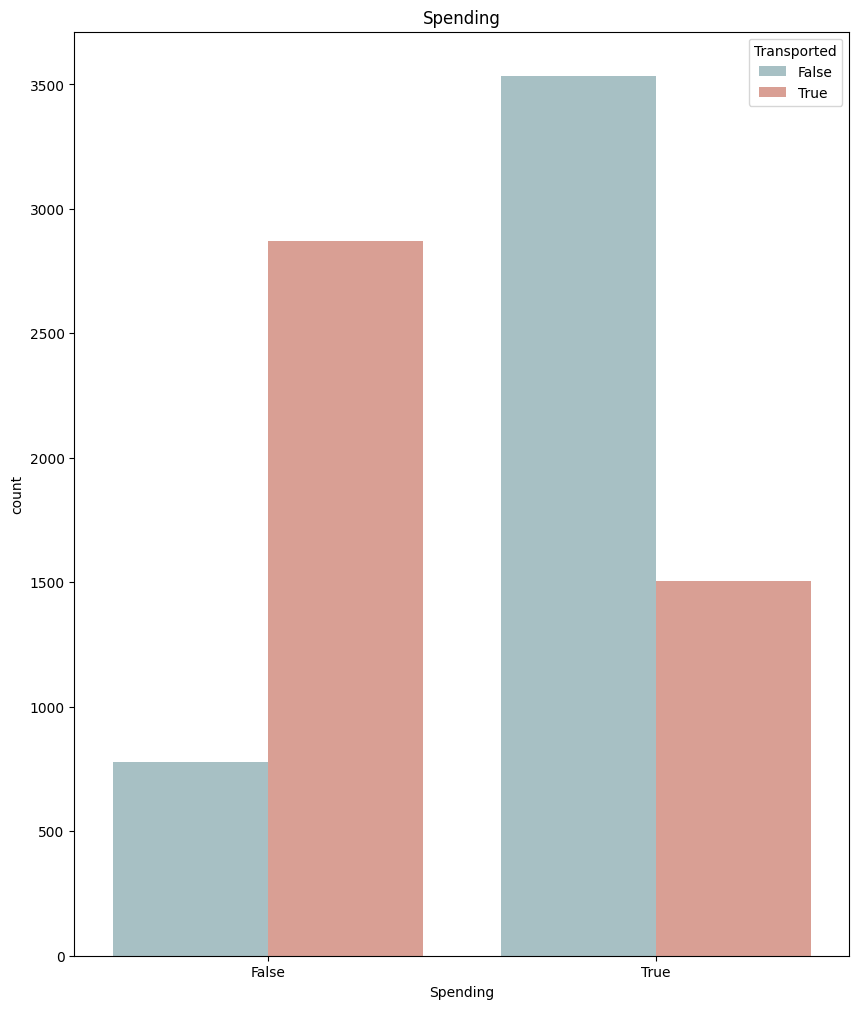

In [222]:
passenger['Expenditure'] = passenger[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum(axis=1)
passenger['Spending'] = (passenger['Expenditure']!=0).astype('bool')
passenger_test['Expenditure'] = passenger_test[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum(axis=1)
passenger_test['Spending'] = (passenger_test['Expenditure']!=0).astype('bool')
fig=plt.figure(figsize=(10,12))

plt.subplot(1,1,1)
sns.countplot(data=passenger, x='Spending', hue='Transported')
plt.title('Spending')
plt.show()

In [223]:
#---------- 處理 CryoSleep - Train ----------#
passenger['Spending'] = passenger[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum(axis=1).astype('bool')
for i in passenger[passenger.CryoSleep.isna()].index:
    if passenger.loc[i, 'Spending'] == False:
        passenger.loc[i, 'CryoSleep'] = True
    else:
        passenger.loc[i, 'CryoSleep'] = False

#---------- 處理 CryoSleep - Test ----------#
passenger_test['Spending'] = passenger_test[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum(axis=1).astype('bool')
for i in passenger_test[passenger_test.CryoSleep.isna()].index:
    if passenger_test.loc[i, 'Spending'] == False:
        passenger_test.loc[i, 'CryoSleep'] = True
    else:
        passenger_test.loc[i, 'CryoSleep'] = False

In [224]:
def create_age_group(data):
    data['Age_group'] = pd.Series(dtype='object')  # Create with object dtype
    data.loc[data['Age'] <= 18, 'Age_group'] = 'Age_0-18'
    data.loc[(data['Age'] > 18) & (data['Age'] <= 26), 'Age_group'] = 'Age_19-26'
    data.loc[(data['Age'] > 26) & (data['Age'] <= 35), 'Age_group'] = 'Age_27-35'
    data.loc[(data['Age'] > 35), 'Age_group'] = 'Age_36+'

# Apply the new age group function to train and test datasets
create_age_group(passenger)
create_age_group(passenger_test)

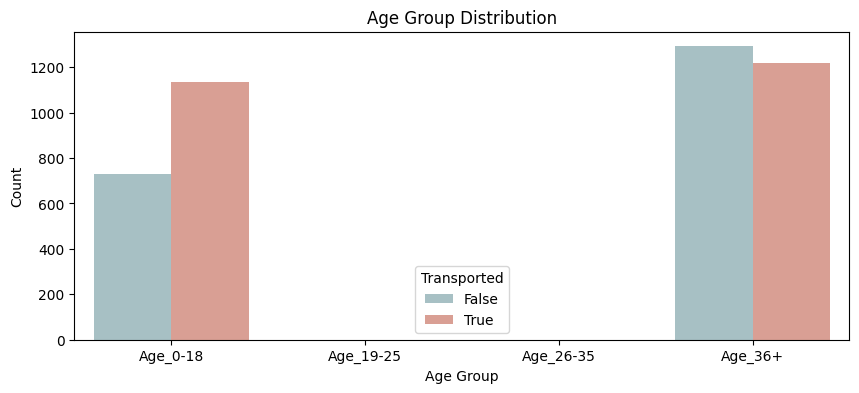

In [225]:
# Plot the distribution of the new age groups
plt.figure(figsize=(10, 4))
g = sns.countplot(data=passenger, x='Age_group', hue='Transported', order=['Age_0-18', 'Age_19-26', 'Age_27-35', 'Age_36+'])
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

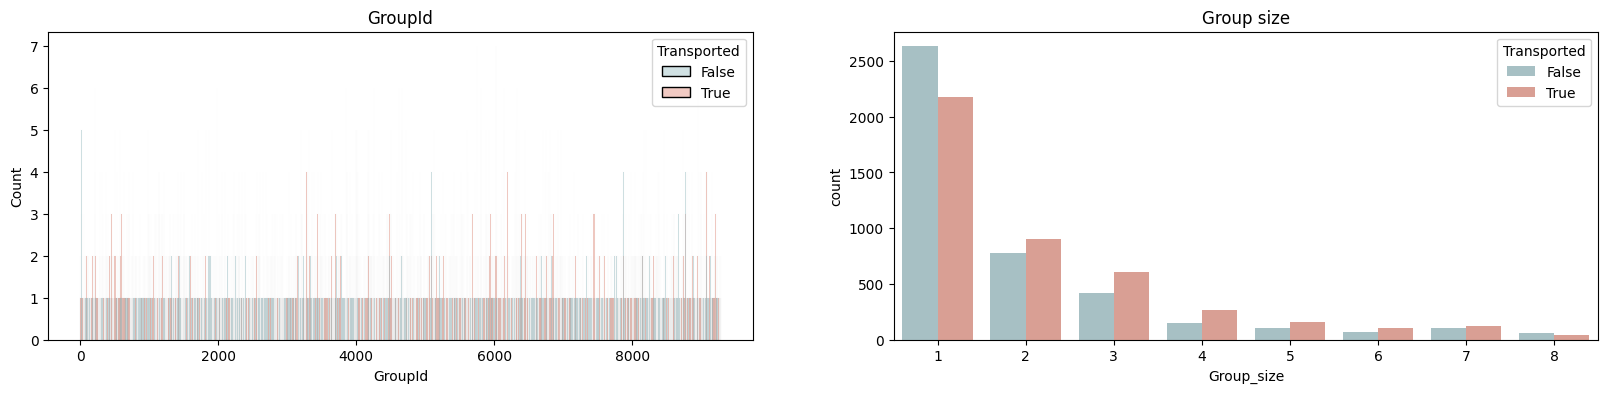

In [226]:
passenger['Group_size']=passenger['GroupId'].map(lambda x: pd.concat([passenger['GroupId'], passenger_test['GroupId']]).value_counts()[x])
passenger_test['Group_size']=passenger_test['GroupId'].map(lambda x: pd.concat([passenger['GroupId'], passenger_test['GroupId']]).value_counts()[x])

# Plot distribution of new features
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=passenger, x='GroupId', hue='Transported', binwidth=1)
plt.title('GroupId')

plt.subplot(1,2,2)
sns.countplot(data=passenger, x='Group_size', hue='Transported')
plt.title('Group size')
fig.tight_layout()

(0.0, 3000.0)

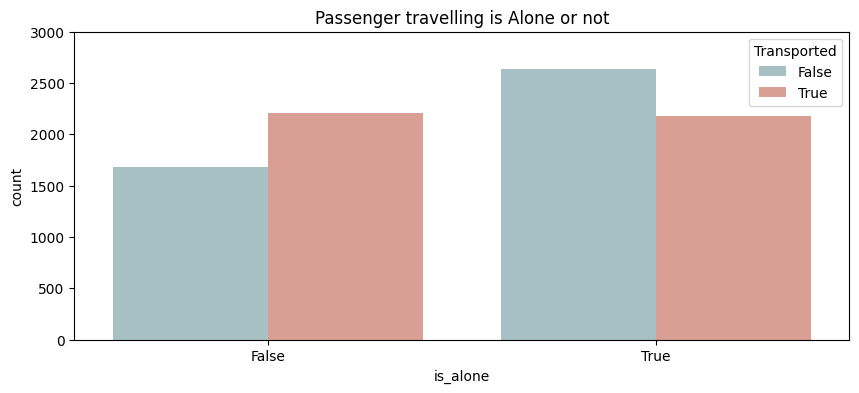

In [227]:
# Add feature "is_alone"
passenger['is_alone']=(passenger['Group_size']==1).astype(bool)
passenger_test['is_alone']=(passenger_test['Group_size']==1).astype(bool)

plt.figure(figsize=(10,4))
sns.countplot(data=passenger, x='is_alone', hue='Transported')
plt.title('Passenger travelling is Alone or not')
plt.ylim([0,3000])

In [228]:
data = passenger.copy()
data_test = passenger_test.copy()
# Drop Useless attr
passenger = passenger.drop(["PassengerId", "GroupId", "ppId", "Cabin", "Name", "FirstName", "LastName", "Group_size","Cabin_num"], axis=1)
# Drop Useless attr
passenger_test = passenger_test.drop(["PassengerId", "GroupId", "ppId", "Cabin", "Name", "FirstName", "LastName","Group_size","Cabin_num"], axis=1)


In [229]:
passenger = data
passenger_test = data_test

In [230]:
# check missing values
print(f'Train set missing values:\n {passenger.isnull().sum()}')
print(f'\nTest set missing values:\n {passenger_test.isnull().sum()}')

Train set missing values:
 PassengerId       0
HomePlanet        8
CryoSleep         0
Cabin             0
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name              0
Transported       0
GroupId           0
ppId              0
Cabin_deck        0
Cabin_num         0
Cabin_side        0
Cabin_size        0
Cabin_1.0         0
Cabin_2.0         0
Cabin_3.0         0
Cabin_4.0         0
Cabin_5.0         0
Cabin_7.0         0
FirstName         0
LastName        200
Family_size     200
Small_family      0
Expenditure       0
Spending          0
Age_group       179
Group_size        0
is_alone          0
dtype: int64

Test set missing values:
 PassengerId       0
HomePlanet       19
CryoSleep         0
Cabin             0
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck       

In [231]:
# Columns with missing values
na_cols=passenger.columns[passenger.isna().any()].tolist()

# Missing values summary
mv=pd.DataFrame(passenger[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(passenger),2)
mv

,Number_missing,Percentage_missing
HomePlanet,8,0.09
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11
VRDeck,188,2.16
LastName,200,2.30


In [232]:
# Define numerical and categorical features
numerical_features = [ col for col in passenger.columns if passenger[col].dtype in ['int64', 'float64']]
categorical_features = [ col for col in passenger.columns if passenger[col].dtype in ['object', 'bool', 'category'] and col != 'Transported']

print(f'Numerical features: {numerical_features}')
print(f'Categorical features: {categorical_features}')



Numerical features: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_size', 'Expenditure', 'Group_size']
Categorical features: ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name', 'ppId', 'Cabin_deck', 'Cabin_side', 'Cabin_1.0', 'Cabin_2.0', 'Cabin_3.0', 'Cabin_4.0', 'Cabin_5.0', 'Cabin_7.0', 'FirstName', 'LastName', 'Family_size', 'Small_family', 'Spending', 'Age_group', 'is_alone']


In [233]:
for col in categorical_features:
    passenger[col] = passenger[col].fillna(passenger[col].mode()[0])  # Fill with mode of each column
    passenger_test[col] = passenger_test[col].fillna(passenger_test[col].mode()[0]) # Fill with mode of each column

# check missing values
print(f'passenger set missing values:\n {passenger.isnull().sum()}')
print(f'\npassenger_test set missing values:\n {passenger_test.isnull().sum()}')

passenger set missing values:
 PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name              0
Transported       0
GroupId           0
ppId              0
Cabin_deck        0
Cabin_num         0
Cabin_side        0
Cabin_size        0
Cabin_1.0         0
Cabin_2.0         0
Cabin_3.0         0
Cabin_4.0         0
Cabin_5.0         0
Cabin_7.0         0
FirstName         0
LastName          0
Family_size       0
Small_family      0
Expenditure       0
Spending          0
Age_group         0
Group_size        0
is_alone          0
dtype: int64

passenger_test set missing values:
 PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age              91
VIP               0
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101

In [234]:
from sklearn.impute import KNNImputer
# impute missing values with knn imputer
num_imputer_knn = KNNImputer()

passenger[numerical_features] = num_imputer_knn.fit_transform(passenger[numerical_features])
passenger_test[numerical_features] = num_imputer_knn.transform(passenger_test[numerical_features])


In [235]:
# Define numerical and categorical features
numerical_features = [ col for col in passenger.columns if passenger[col].dtype in ['int64', 'float64']and col != 'Cabin_size']
categorical_features = [ col for col in passenger.columns if passenger[col].dtype in ['object', 'bool', 'category'] and col != 'Transported']

print(f'Numerical features: {numerical_features}')
print(f'Categorical features: {categorical_features}')


Numerical features: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Expenditure', 'Group_size']
Categorical features: ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name', 'ppId', 'Cabin_deck', 'Cabin_side', 'Cabin_1.0', 'Cabin_2.0', 'Cabin_3.0', 'Cabin_4.0', 'Cabin_5.0', 'Cabin_7.0', 'FirstName', 'LastName', 'Family_size', 'Small_family', 'Spending', 'Age_group', 'is_alone']


In [236]:
# quickcheck for missing values
passenger_summary = pd.DataFrame({
    'Unique Values': passenger.nunique(),
    'Data Type': passenger.dtypes,
    'Missing Values': passenger.isnull().sum()
})

# Display the summary table
passenger_summary

,Unique Values,Data Type,Missing Values
PassengerId,8693,object,0
HomePlanet,3,object,0
CryoSleep,2,bool,0
Cabin,6561,object,0
Destination,3,object,0
Age,149,float64,0
VIP,2,bool,0
RoomService,1348,float64,0
FoodCourt,1574,float64,0
ShoppingMall,1176,float64,0


In [237]:
# quickcheck for missing values
passenger_test_summary = pd.DataFrame({
    'Unique Values': passenger_test.nunique(),
    'Data Type': passenger_test.dtypes,
    'Missing Values': passenger_test.isnull().sum()
})

# Display the summary table
passenger_test_summary

,Unique Values,Data Type,Missing Values
PassengerId,4277,object,0
HomePlanet,3,object,0
CryoSleep,2,bool,0
Cabin,3266,object,0
Destination,3,object,0
Age,123,float64,0
VIP,2,bool,0
RoomService,876,float64,0
FoodCourt,945,float64,0
ShoppingMall,755,float64,0


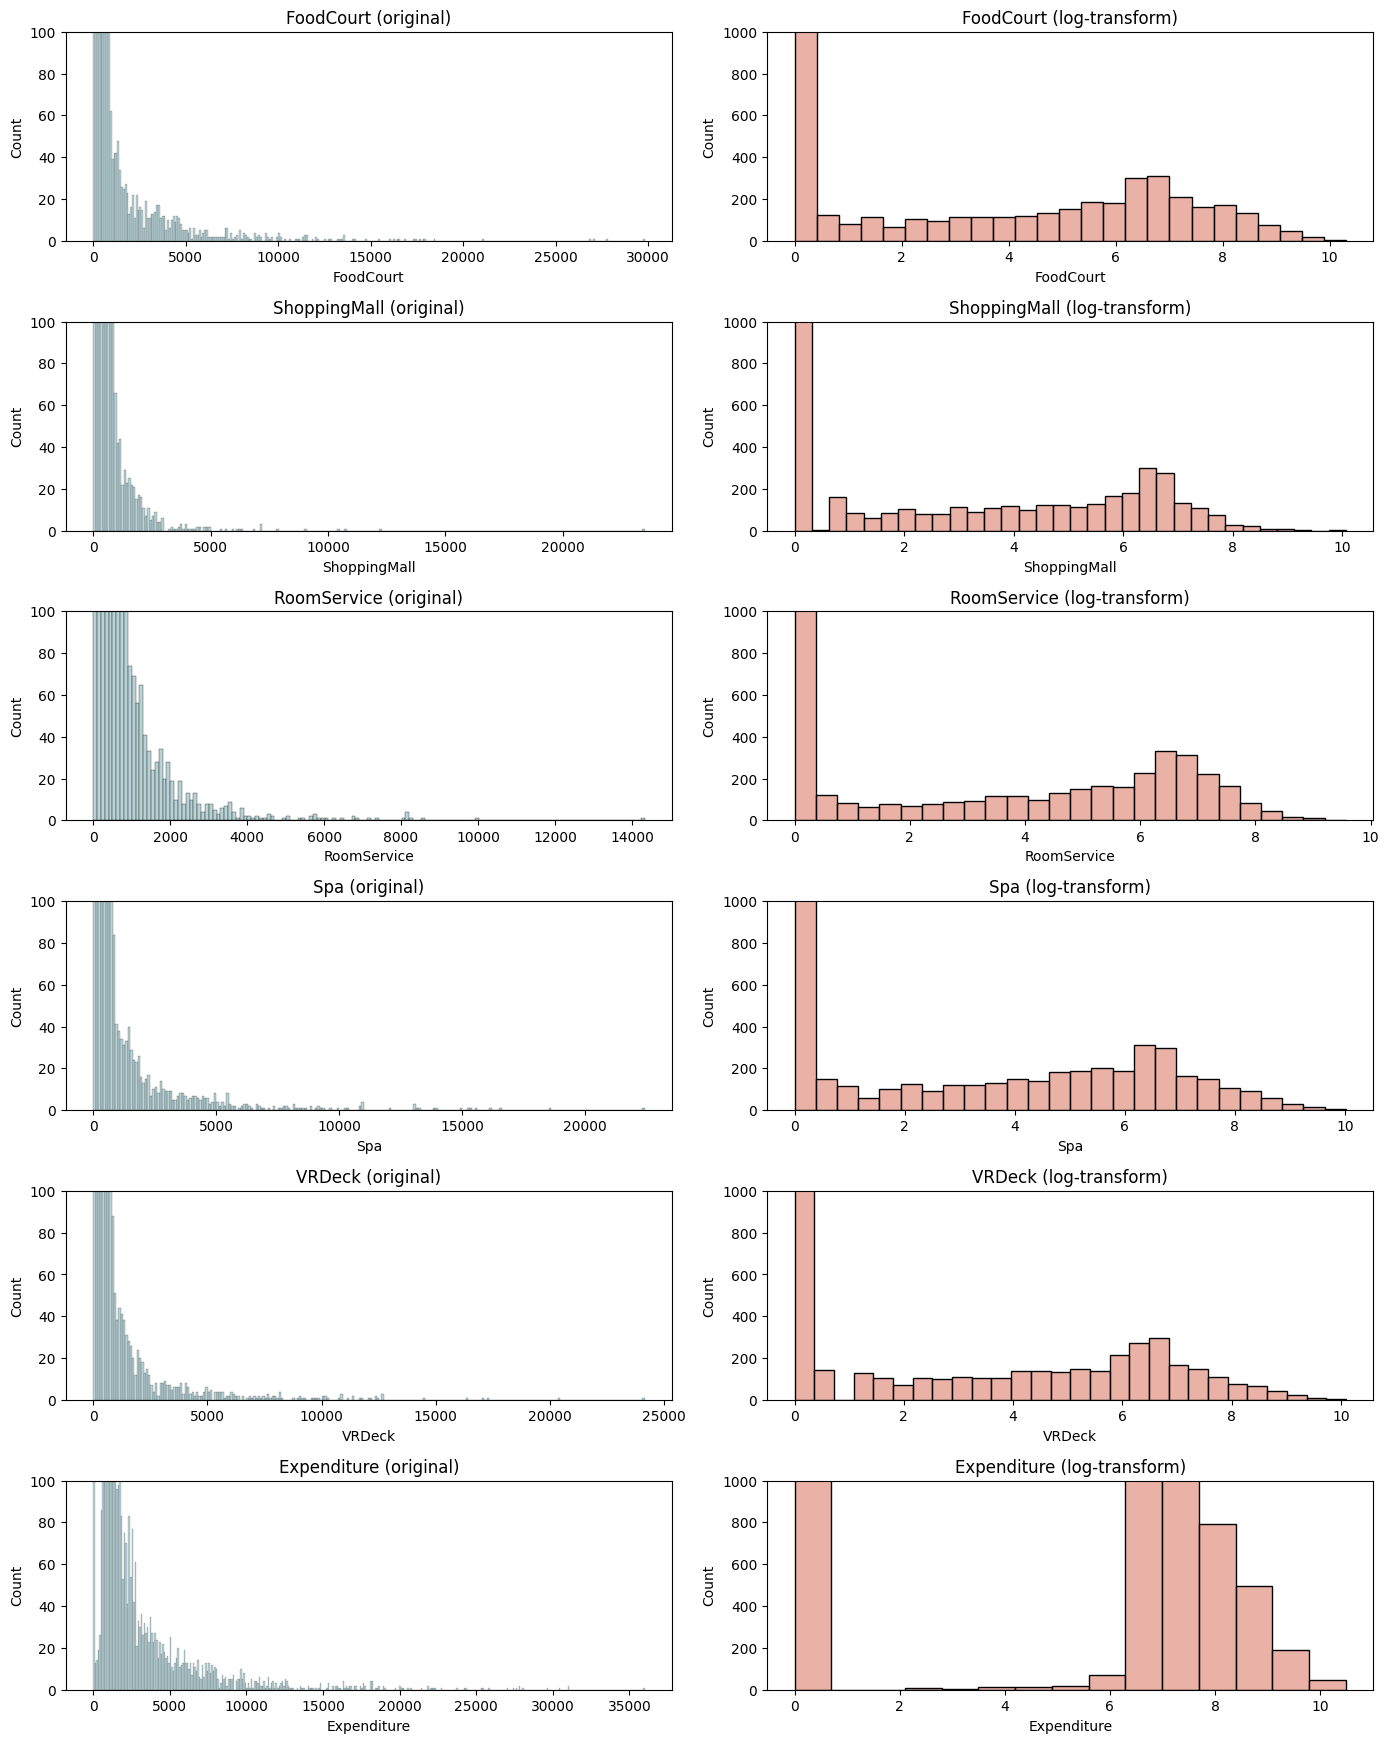

In [238]:
continuous_features = ['FoodCourt','ShoppingMall','RoomService','Spa','VRDeck','Expenditure']

# Plot log transform results
fig=plt.figure(figsize=(14,20))
for i, col in enumerate(continuous_features):
    plt.subplot(7,2,2*i+1)
    sns.histplot(passenger[col], binwidth=100)
    plt.ylim([0,100])
    plt.title(f'{col} (original)')

    plt.subplot(7,2,2*i+2)
    sns.histplot(np.log(1+passenger[col]), color='C1')
    plt.ylim([0,1000])
    plt.title(f'{col} (log-transform)')

fig.tight_layout()
plt.show()

In [239]:
# Log transform the continuous features
passenger[continuous_features] = np.log1p(passenger[continuous_features])
passenger_test[continuous_features] = np.log1p(passenger_test[continuous_features])

In [240]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Scale the numerical features
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# One-hot encode the categorical features
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='if_binary', sparse_output=False))
])

# combine the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical_features),
        ('cat', cat_transformer, categorical_features)
        ],
        remainder='passthrough'
    )

In [1]:
# split the data into features and target
X = passenger.drop(['Transported','Cabin_size'], axis=1)
y = passenger['Transported']
X_test = passenger_test.drop(['Cabin_size'], axis=1)

# split the data into passenger and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=24)

# fit the preprocessor
# X = preprocessor.fit_transform(X)           # fit_transform on train set
X_train = preprocessor.fit_transform(X_train)     # fit_transform on train set
X_val = preprocessor.transform(X_val)           # transform on train set
# X_test = preprocessor.transform(X_test)     # transform on test set

# check the shape of the datasets
print(f'Train set shape: {X_train.shape}')
print(f'Validation set shape: {X_val.shape}')
print(f'Test set shape: {X_test.shape}')

NameError: name 'passenger' is not defined

In [241]:
!pip install lazypredict

In [244]:

import lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(
    verbose=0,
    ignore_warnings=True,
    custom_metric=None,
    predictions=False,
    random_state=42,
    classifiers='all'
)

models, predictions = clf.fit(X_train, X_val, y_train, y_val)

models

  0%|          | 0/31 [00:10<?, ?it/s]


KeyboardInterrupt: 

# Select a model and train it

In [ ]:
# tools
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# models
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm          import SVC
from sklearn.tree         import DecisionTreeClassifier
from sklearn.ensemble     import RandomForestClassifier
from sklearn.ensemble     import ExtraTreesClassifier
from sklearn.ensemble     import BaggingClassifier
from sklearn.ensemble     import AdaBoostClassifier
from sklearn.ensemble     import GradientBoostingClassifier
from xgboost              import XGBClassifier

# var
model_list = {}

# func
def score(grid_result):
    # 評估，打分數
    print(f"最佳準確率: {grid_result.best_score_}，最佳參數組合：{grid_result.best_params_}")
    # 取得 cross validation 的平均準確率及標準差
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print(f"{param} {mean}")

In [ ]:
# Test
rnd_clf = RandomForestClassifier(n_estimators=400, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_val)
print(rnd_clf.__class__.__name__, accuracy_score(y_val, y_pred))

RandomForestClassifier 0.8102357676825762


In [ ]:
!pip install catboost
!pip install lightgbm

In [ ]:
from lightgbm             import LGBMClassifier
from sklearn.ensemble     import RandomForestClassifier
from xgboost              import XGBClassifier
from sklearn.svm          import SVC
from sklearn.ensemble     import ExtraTreesClassifier
from catboost             import CatBoostClassifier
from sklearn.ensemble     import AdaBoostClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define models and parameter grids
models_with_params = {
    "LightGBM": (LGBMClassifier(random_state=42,logging_level='none', verbose=-1), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10, 20],
        'min_child_samples': [20, 30,50,100],
        'min_split_gain': [0, 0.1]
    }),
    "Random Forest": (RandomForestClassifier(random_state=42), {
        'n_estimators': [1,5,10,20],
        'max_depth': [None],
        'min_samples_split': [2, 5, 10, 20],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    }),
    "XGBoost": (XGBClassifier(random_state=42, eval_metric='logloss'), {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.6, 0.8, 1],
    }),
    "SVM Classifier": (SVC(random_state=42, kernel='rbf', probability=True), {
        'C': [0.1, 1, 10, 100],
        'gamma': [1, 0.1, 0.01, 0.001]
    }),
    "Extra-Trees": (ExtraTreesClassifier(random_state=42), {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    }),
    "CatBoost": (CatBoostClassifier(random_state=42, verbose=0), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'depth': [2, 4, 6, 8]
    }),
    "AdaBoost": (AdaBoostClassifier(random_state=42), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2]
    })

}

In [208]:
# Function to perform hyperparameter tuning and evaluate the model
from sklearn.metrics import f1_score, precision_score, recall_score
def tune_and_evaluate_model(model_name, model, params, X_train, y_train, X_val, y_val):
    # Perform GridSearchCV
    search = GridSearchCV(model, params, scoring='roc_auc', cv=3, n_jobs=-1)
    search.fit(X_train, y_train)

    # Retrieve the best model
    best_model = search.best_estimator_

    # Make predictions on the validation set
    y_pred = best_model.predict(X_val)
    y_proba = best_model.predict_proba(X_val)[:, 1]

    # Calculate performance metrics
    accuracy = accuracy_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_proba)
    f1 = f1_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)

    # Print the results
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"AUC: {auc}")
    print(f"F1 Score: {f1}")

    return {"Model": model_name, "Accuracy": accuracy, "AUC": auc, "F1_score": f1, "Precision_score":precision, "Recall_score":recall, "Best Params": search.best_params_}

In [ ]:
# Store results
results = []

# Iterate over models and perform tuning/evaluation
(model, params) = models_with_params['LightGBM']
result = tune_and_evaluate_model('LightGBM', model, params, X_train, y_train, X_val, y_val)
results.append(result)

In [ ]:
R = results
del(results[4])

In [ ]:

# Iterate over models and perform tuning/evaluation
(model, params) = models_with_params['Random Forest']
result = tune_and_evaluate_model('Random Forest', model, params, X_train, y_train, X_val, y_val)
results.append(result)


In [ ]:
RF_model = result['Best Params']
print(RF_model)
#best_model.fit(X_train, y_train)
#y_test_pred = best_model.predict(X_test)

{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
# Iterate over models and perform tuning/evaluation
(model, params) = models_with_params['XGBoost']
result = tune_and_evaluate_model('XGBoost', model, params, X_train, y_train, X_val, y_val)
results.append(result)

In [ ]:
# Iterate over models and perform tuning/evaluation
(model, params) = models_with_params['SVM Classifier']
result = tune_and_evaluate_model('SVM Classifier', model, params, X_train, y_train, X_val, y_val)
results.append(result)

In [ ]:
# Iterate over models and perform tuning/evaluation
(model, params) = models_with_params['Extra-Trees']
result = tune_and_evaluate_model('Extra-Trees', model, params, X_train, y_train, X_val, y_val)
results.append(result)

In [ ]:
(model, params) = models_with_params['CatBoost']
result = tune_and_evaluate_model('CatBoost', model, params, X_train, y_train, X_val, y_val)
results.append(result)

In [ ]:
(model, params) = models_with_params['AdaBoost']
result = tune_and_evaluate_model('AdaBoost', model, params, X_train, y_train, X_val, y_val)
results.append(result)

In [ ]:
# Convert results to a DataFrame for display
pd.DataFrame(results)

,Model,Accuracy,AUC,Best Params
0,LightGBM,0.80,0.91,"{'learning_rate': 0.1, 'max_depth': 20, 'min_c..."
1,Random Forest,0.82,0.90,"{'max_depth': None, 'min_samples_split': 10, '..."
2,XGBoost,0.81,0.91,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
3,SVM Classifier,0.81,0.90,"{'C': 10, 'gamma': 0.01}"
4,Random Forest,0.82,0.90,"{'max_depth': 20, 'max_features': 'sqrt', 'min..."
5,CatBoost,0.81,0.91,"{'depth': 6, 'learning_rate': 0.1, 'n_estimato..."
6,AdaBoost,0.80,0.89,"{'learning_rate': 0.2, 'n_estimators': 200}"


# Result

In [ ]:
print(results[4])

{'Model': 'Random Forest', 'Accuracy': 0.8154111558366878, 'AUC': 0.9015337098715623, 'Best Params': {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}}


In [ ]:
RF_model = results[1].get('Best Params')  # Use get method to avoid KeyError
RF_model = RandomForestClassifier(**RF_model, random_state=42) # Instantiate the model with best params
RF_model.fit(X_train, y_train)
RF_val_pred = RF_model.predict(X_val)
print(RF_model.__class__.__name__, accuracy_score(y_val, RF_val_pred))
print(RF_model)

RandomForestClassifier 0.8154111558366878
RandomForestClassifier(min_samples_split=10, n_estimators=200, random_state=42)


In [ ]:
LGB_model = results[0].get('Best Params')  # Use get method to avoid KeyError
LGB_model = LGBMClassifier(**LGB_model, random_state=42) # Instantiate the model with best params
LGB_model.fit(X_train, y_train)
LGB_val_pred = LGB_model.predict(X_val)
print(LGB_model.__class__.__name__, accuracy_score(y_val, LGB_val_pred))

LGBMClassifier 0.8016101207590569


In [ ]:
XGB_model = results[2].get('Best Params')  # Use get method to avoid KeyError
XGB_model = XGBClassifier(**XGB_model, random_state=42) # Instantiate the model with best params
XGB_model.fit(X_train, y_train)
XGB_val_pred = XGB_model.predict(X_val)
print(XGB_model.__class__.__name__, accuracy_score(y_val, XGB_val_pred))
print(XGB_model)

XGBClassifier 0.8113858539390454
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


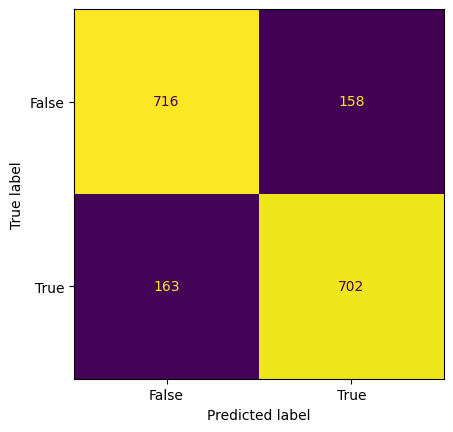

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_mat = confusion_matrix(y_val, RF_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=[False, True])
disp.plot(colorbar=False)
plt.show()

In [ ]:
X = passenger.drop(['Transported','Cabin_size'], axis=1)
y = passenger['Transported']
X_test = passenger_test.drop(['Cabin_size'], axis=1)
X = preprocessor.fit_transform(X)
X_test = preprocessor.transform(X_test)


In [ ]:

from sklearn.model_selection import LearningCurveDisplay
best_para = {'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
print(best_para)
best_model = RandomForestClassifier(**best_para, random_state=42)
best_model.fit(X, y)
y_test_pred = best_model.predict(X_test)


{'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
print(best_model.__class__.__name__, accuracy_score(test, y_test_pred))

TypeError: '<' not supported between instances of 'bool' and 'str'

In [ ]:
# Prepare the submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],  # Assign PassengerId from the original test dataset
    'Transported': y_test_pred     # Predicted values for the target variable
})

# Ensure 'Transported' column is in boolean format
submission['Transported'] = submission['Transported'].astype(bool)

# Save the submission file to CSV
submission.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created successfully!")

# Display the first few rows of the submission DataFrame
print(submission.head(10))

  PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01        False
5     0027_01        False
6     0029_01         True
7     0032_01         True
8     0032_02         True
9     0033_01         True


In [202]:
#download submittion.csv
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>